In [320]:
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

This was the kaggle competition :)))

In [321]:
test = pd.read_csv("./test.csv")

In [322]:
train = pd.read_csv("./train.csv")

In [323]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

In [324]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [325]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Value

In [326]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [327]:
train.isnull().sum()/len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [328]:
train.drop(['Cabin'] ,axis=1 , inplace=True)
test.drop(['Cabin'] ,axis=1 , inplace=True)


In [329]:
train.drop(['Ticket'] ,axis=1 , inplace=True)
test.drop(['Ticket'] ,axis=1 , inplace=True)


In [330]:
le = preprocessing.LabelEncoder()

In [331]:
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])


In [332]:
test['Fare'].fillna(value=test['Fare'].mean() , inplace=True)

In [333]:
train['Age'].fillna(value=train['Age'].mean() , inplace=True)
test['Age'].fillna(value=test['Age'].mean() , inplace=True)


In [334]:
train['Embarked'].fillna(value=train['Embarked'].mode()[0] , inplace=True)
test['Embarked'].fillna(value=train['Embarked'].mode()[0] , inplace=True)


In [335]:
train['Embarked'] = le.fit_transform(train["Embarked"])
test['Embarked'] = le.fit_transform(test["Embarked"])


In [336]:
train['Sex'].mode()

0    1
Name: Sex, dtype: int64

In [337]:
train.drop(['Name'] , axis = 1 , inplace =True)
test.drop(['Name'] , axis = 1 , inplace =True)

In [338]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [339]:
trainX = train[['PassengerId' , 'Pclass' , "Sex" , 'Age' , 'SibSp' , 'Parch' , "Fare" , 'Embarked']]
trainY = train['Survived']

In [340]:
testX = test[['PassengerId' , 'Pclass' , "Sex" , 'Age' , 'SibSp' , 'Parch' , "Fare" , 'Embarked']]


<AxesSubplot: >

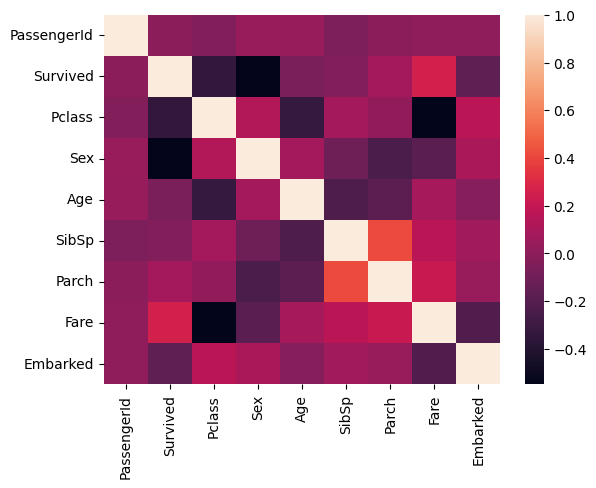

In [341]:
heatMap = train.corr()
sns.heatmap(heatMap)

In [342]:
dictOfCorr = dict(heatMap['Survived'])

In [343]:
dictOfCorr

{'PassengerId': -0.0050066607670665175,
 'Survived': 1.0,
 'Pclass': -0.33848103596101514,
 'Sex': -0.543351380657755,
 'Age': -0.06980851528714313,
 'SibSp': -0.035322498885735576,
 'Parch': 0.08162940708348335,
 'Fare': 0.2573065223849626,
 'Embarked': -0.16767531386772133}

In [344]:
sorted(dictOfCorr.items() , key=lambda x: x[1] , reverse=True)

[('Survived', 1.0),
 ('Fare', 0.2573065223849626),
 ('Parch', 0.08162940708348335),
 ('PassengerId', -0.0050066607670665175),
 ('SibSp', -0.035322498885735576),
 ('Age', -0.06980851528714313),
 ('Embarked', -0.16767531386772133),
 ('Pclass', -0.33848103596101514),
 ('Sex', -0.543351380657755)]

## Build a Model

In [345]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


In [346]:
def plotConf (y , pred):
    theMat = confusion_matrix(y , pred)
    
    cm = ConfusionMatrixDisplay(confusion_matrix=theMat , display_labels=['Died', 'Surv'])
    
    
    
    cm.plot(cmap='mako')
    plt.show()
    

In [347]:
clf = DecisionTreeClassifier()

In [348]:
hyperparametes = {
    'criterion': ['entropy'],
    'max_depth' : range(1 , 10)
    
}

In [349]:
hyp = GridSearchCV(clf , hyperparametes , scoring='accuracy')

In [350]:
hyp.fit(trainX , trainY)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 10)},
             scoring='accuracy')

In [351]:
bestEst = hyp.best_estimator_

In [355]:
thePred = bestEst.predict(testX)

In [356]:
#print ('acuuracy is :' , 100* accuracy_score(trainX , thePred))

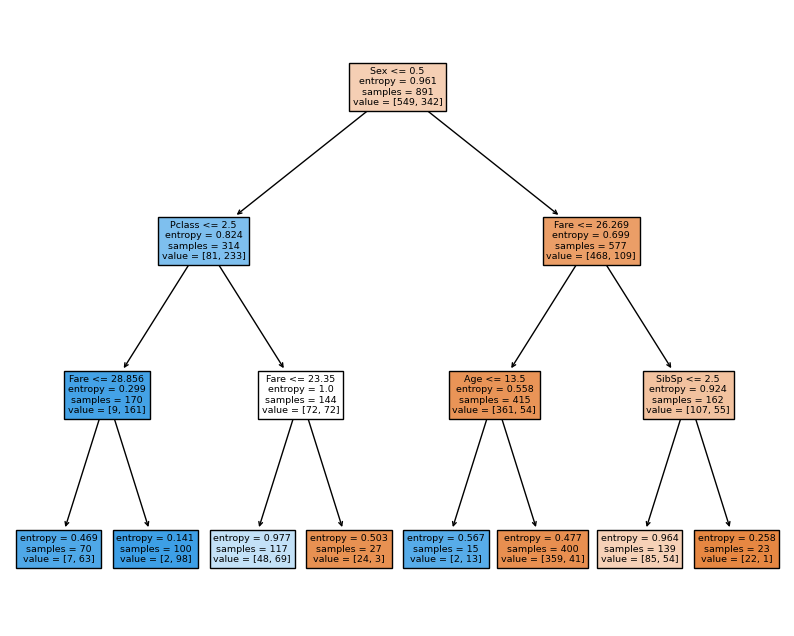

In [357]:
plt.figure(figsize=(10, 8))
plot_tree(bestEst , feature_names= trainX.columns.values, filled=True)
plt.show()

In [358]:
plotConf(trainY , thePred)

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]

In [383]:
df = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived':thePred})

In [384]:
df.to_csv('pred.csv' , index=False)

In [381]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
